In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('gw2.csv')

In [ ]:
df.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Femi Seriki,DEF,Sheffield Utd,-0.5,0,0,0,0,0.0,653,...,1,2,0.0,0,708,833,125,40,False,0
1,Radek Vítek,GK,Man Utd,1.5,0,0,0,0,0.0,669,...,0,2,0.0,0,0,0,0,40,False,0
2,Jack Hinshelwood,MID,Brighton,0.0,0,0,0,0,0.0,621,...,4,1,0.0,0,-44,127,171,45,False,0
3,Jadon Sancho,MID,Man Utd,1.5,0,0,7,0,1.9,397,...,0,2,0.0,1,-10687,2309,12996,70,False,0
4,Rhys Norrington-Davies,DEF,Sheffield Utd,0.0,0,0,0,0,0.0,487,...,1,2,0.0,0,-795,168,963,40,False,0


In [1]:
#Standard data manipulations
import pandas as pd
import numpy as np

#SQL
import sqlite3
#Including custom functions, stored elsewhere in the repo
# from PythonFunctions.sqlfunctions import *

#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [7]:
#Connect to the database 'fpl.db' (fantasy premier league!)
conn = sqlite3.connect('fpl.db')
#Instantiate a cursor
c = conn.cursor()

In [8]:
#Print the names of the tables in the SQL database
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

TeamsBasic
PlayersBasic
ShotsDetail
PlayerMatchesDetail
TeamMatchesDetail
FixturesBasic
TeamsXGC
PlayersXG
PlayerAPIStats
TeamsXG


In [9]:
query = "SELECT * FROM PlayersBasic "

# Use pd.read_sql to fetch and create a DataFrame
df_players = pd.read_sql(query, conn)


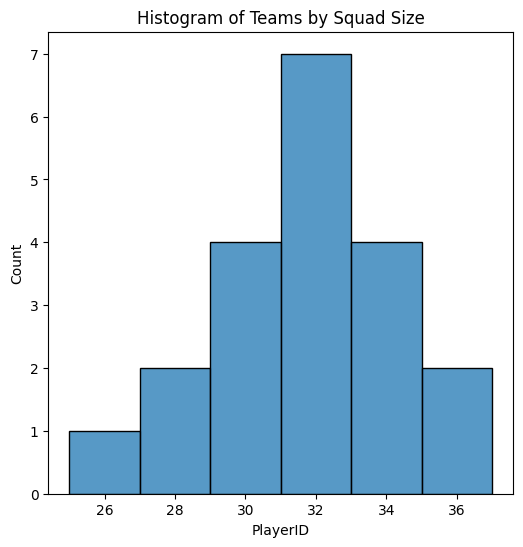

In [10]:
# Create a histogram using Seaborn
plt.figure(figsize=(6, 6))
sns.histplot(data=df_players.groupby('Team').count()['PlayerID'], bins=6, kde=False)
plt.title('Histogram of Teams by Squad Size')

plt.show()

<ipython-input-11-920f2a64aa6f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=players_pivot, orient='h', ci=None, palette='Set2')


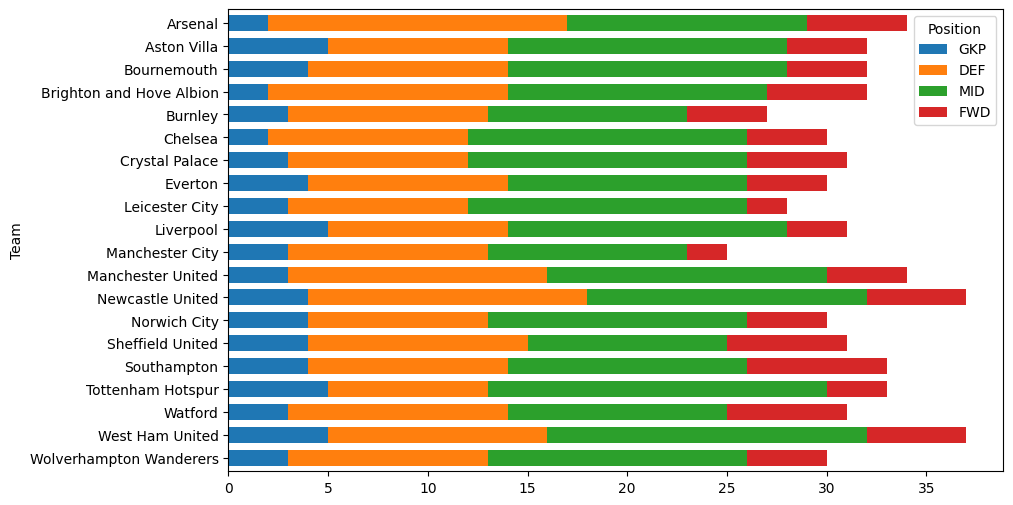

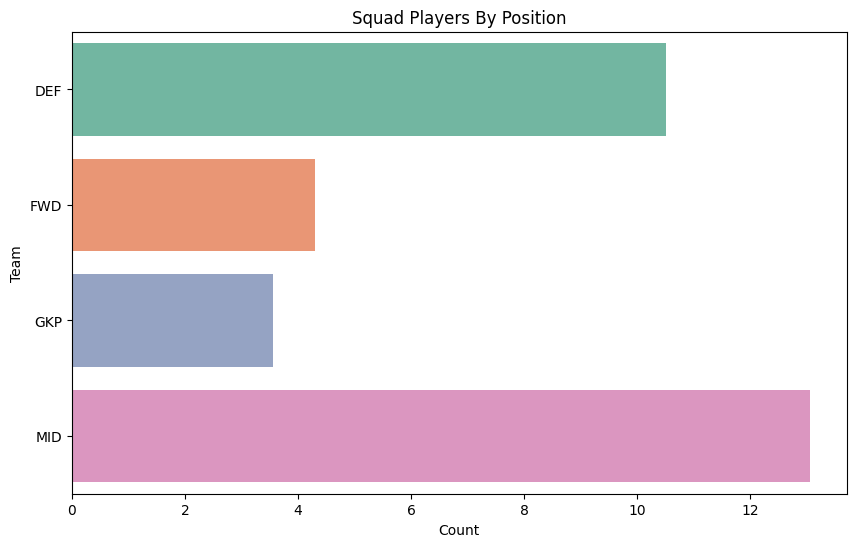

In [11]:
players_pivot = df_players.pivot_table(index='Team',
                                       columns='Position',
                                       aggfunc='count')['CommentName']

players_pivot[['GKP','DEF','MID','FWD']][::-1].plot.barh(stacked=True,
                                                         figsize=(10,6),
                                                         width=0.7);
# Create a stacked horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=players_pivot, orient='h', ci=None, palette='Set2')
plt.title('Squad Players By Position')
plt.xlabel('Count')
plt.ylabel('Team')

plt.show()

In [12]:
query = '''SELECT * FROM PlayerAPIStats
                    JOIN PlayersBasic
                    USING(PlayerID)'''

# Use pd.read_sql to fetch and create a DataFrame
df_players = pd.read_sql(query, conn)
df_players.head()

,PlayerAPIStatsID,TableIndex,BPS,CleanSheet,Date,GameWeek,MinutesPlayed,NetTransfersIn,PlayerID,Points,Price,Saves,SelectedBy,PlayersBasicID,PlayerCode,FirstName,WebName,Team,Position,CommentName
0,1,0,0,0.0,2019-08-11,1,0.0,0,1,0,5.5,0.0,33117,1,69140,Shkodran,Mustafi,Arsenal,DEF,Shkodran Mustafi
1,2,1,0,0.0,2019-08-17,2,0.0,-5280,1,0,5.5,0.0,36709,1,69140,Shkodran,Mustafi,Arsenal,DEF,Shkodran Mustafi
2,3,2,0,0.0,2019-08-24,3,0.0,-6882,1,0,5.4,0.0,30975,1,69140,Shkodran,Mustafi,Arsenal,DEF,Shkodran Mustafi
3,4,3,0,0.0,2019-09-01,4,0.0,-3872,1,0,5.4,0.0,28096,1,69140,Shkodran,Mustafi,Arsenal,DEF,Shkodran Mustafi
4,5,4,0,0.0,2019-09-15,5,0.0,-2073,1,0,5.3,0.0,26902,1,69140,Shkodran,Mustafi,Arsenal,DEF,Shkodran Mustafi


In [13]:
def kpi_kde(week, kpi, minutes=45, positions=None, size=(10,4), title=None, df=df_players):
    '''
    Takes a gameweek, a kpi, a minutes threshold, and a list of positions,
    and outputs a chart showing KDEs for the given kpi
    '''
    #Check if week is given as a list
    if type(week)!=list:
        week = [week]

    if positions == None:
        positions = ['GKP','DEF','MID','FWD']

    plt.figure(figsize=size)
    color_count = 0
    for i in week:
        for j in positions:
            X = df_players.loc[(df['MinutesPlayed']>=minutes)
                              &(df['Position']==j)
                              &(df['GameWeek']==i)
                              ][kpi]
            label = f'{j}, gameweek {i}'
            sns.kdeplot(X,
                        label=label, lw=3)
            color_count += 1

    if title==None:
        plt.title(f'KDE for Player {kpi}')
    else:
        plt.title(title)

    plt.xlabel(f'Player {kpi}')

    plt.ylim(0,)
    plt.yticks([])
    sns.despine(left=True)

    plt.legend(frameon=False)

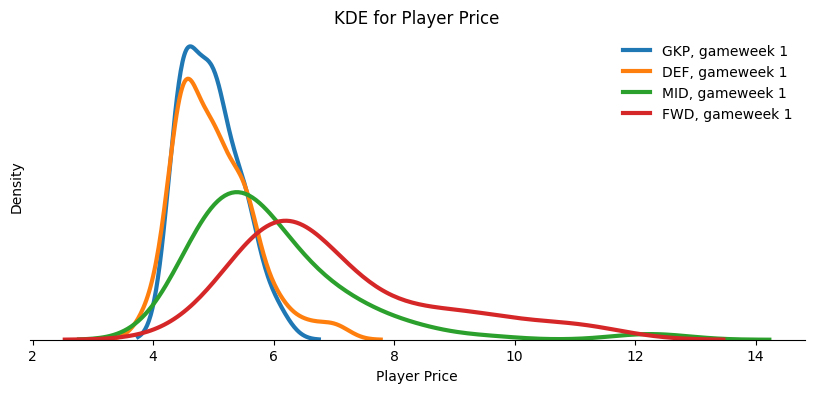

In [14]:
kpi_kde(1,'Price')

In [15]:
c = conn.cursor()

query = '''SELECT * FROM TeamMatchesDetail'''

# Use pd.read_sql to fetch and create a DataFrame
df_matches = pd.read_sql(query, conn)
df_matches.sort_values('MatchID', inplace=True)
df_matches.head()

,TeamMatchesDetailID,TableIndex,MatchID,ForTeam,AgainstTeam,RelativeStrength,GameWeek,Home,Possession,Goals,...,Headers,ShotsCentre,ShotsLeft,ShotsRight,ShotsInBoxConceded,CloseShotsConceded,HeadersConceded,ShotsCentreConceded,ShotsLeftConceded,ShotsRightConceded
0,1,0,46605,Liverpool,Norwich City,3,1,Home,57.9,4,...,2,6,2,2,7,7,1,4,3,1
1,2,1,46605,Norwich City,Liverpool,-3,1,Away,42.1,1,...,1,4,3,1,10,9,2,6,2,2
2,3,2,46606,Bournemouth,Sheffield United,0,1,Home,52.9,1,...,1,4,1,1,2,4,0,2,0,0
3,4,3,46606,Sheffield United,Bournemouth,0,1,Away,47.1,1,...,0,2,0,0,6,4,1,4,1,1
557,558,3,46606,Sheffield United,Bournemouth,1,1,Away,47.1,1,...,0,2,0,0,6,4,1,4,1,1


In [19]:
df_teams

,TeamMatchesDetailID,TableIndex,MatchID,ForTeam,AgainstTeam,RelativeStrength,GameWeek,Home,Possession,Goals,...,Headers,ShotsCentre,ShotsLeft,ShotsRight,ShotsInBoxConceded,CloseShotsConceded,HeadersConceded,ShotsCentreConceded,ShotsLeftConceded,ShotsRightConceded
0,1,0,46605,Liverpool,Norwich City,3,1,Home,57.9,4,...,2,6,2,2,7,7,1,4,3,1
1,2,1,46605,Norwich City,Liverpool,-3,1,Away,42.1,1,...,1,4,3,1,10,9,2,6,2,2
2,3,2,46606,Bournemouth,Sheffield United,0,1,Home,52.9,1,...,1,4,1,1,2,4,0,2,0,0
3,4,3,46606,Sheffield United,Bournemouth,0,1,Away,47.1,1,...,0,2,0,0,6,4,1,4,1,1
4,5,4,46607,Burnley,Southampton,1,1,Home,46.5,3,...,2,3,1,4,5,3,0,1,4,0
5,6,5,46607,Southampton,Burnley,-1,1,Away,53.5,0,...,0,1,4,0,7,5,2,3,1,4
6,7,6,46608,Crystal Palace,Everton,0,1,Home,35.4,0,...,1,2,3,1,7,4,1,6,1,0
7,8,7,46608,Everton,Crystal Palace,0,1,Away,64.6,0,...,1,6,1,0,6,2,1,2,3,1
8,9,8,46609,Leicester City,Wolverhampton Wanderers,1,1,Home,70.0,0,...,2,3,0,1,4,2,1,2,1,1
9,10,9,46609,Wolverhampton Wanderers,Leicester City,-1,1,Away,30.0,0,...,1,2,1,1,4,2,2,3,0,1


In [24]:
query = '''SELECT * FROM TeamsBasic'''
df_teams = pd.read_sql(query, conn).head(30)
# df_teams['TeamColor'] = df_teams['ShortName'].map(lambda x: team_colors[x])
df_teams.head()

,TeamsBasicID,TeamID,Team,ShortName,Strength,CommentName
0,1,1,Arsenal,ARS,4,Arsenal
1,2,2,Aston Villa,AVL,2,Aston Villa
2,3,3,Bournemouth,BOU,3,Bournemouth
3,4,4,Brighton,BHA,3,Brighton and Hove Albion
4,5,5,Burnley,BUR,3,Burnley


In [28]:
def add_spaces(text):
    '''
    Adds spaces before capital letters in a camel case string
    '''

    return re.sub(r"(\w)([A-Z])", r"\1 \2", text)

def team_df_generator(home='both', gameweeks=None, agg='mean', kpi=None):

    '''
    Creates an aggregated view of team performance,
    and returns the dataframe (with all KPIs)
    '''

    df_temp = df_matches.iloc[:,2:]

    #Strip out gameweeks / away-home splits as required
    if gameweeks!=None:
        df_temp = df_temp.loc[df_temp['GameWeek'].isin(gameweeks)]
    if home!='both':
        df_temp = df_matches.loc[df_matches['Home']==home]

    #Do the aggregation
    if agg=='mean':
        df_temp = df_temp.groupby('ForTeam').mean()
    elif agg=='sum':
        df_temp = df_temp.groupby('ForTeam').sum()
    elif agg=='median':
        df_temp = df_temp.groupby('ForTeam').median()
    elif agg=='std':
        df_temp = df_temp.groupby('ForTeam').std()
    elif agg=='max':
        df_temp = df_temp.groupby('ForTeam').max()
    elif agg=='min':
        df_temp = df_temp.groupby('ForTeam').min()

    if kpi==None:
        return df_temp
    else:
        return df_temp[kpi]


def team_bar(kpi, title=None, home='both', gameweeks=None,
             agg='mean', size=(10,7), order=True):

    '''
    Creates a one KPI bar chart, ordering
    '''

    if title==None:
        kpi_label = add_spaces(kpi)
        if home=='both':
            title=f'{agg.title()} {kpi_label} Per Game'
        else:
            title=f'{agg.title()} {kpi_label} Per Game at {home}'

    df_temp = team_df_generator(home=home,
                                gameweeks=gameweeks, agg=agg)
    df_temp = df_temp.sort_values(kpi, ascending=order)

    Y = df_temp[kpi][::-1]
    X = range(1,len(Y)+1)
    L = df_temp.index
    # c = [df_teams.loc[df_teams['CommentName']==i,'TeamColor'].item()
    #      for i in L][::-1]

    plt.figure(figsize=(size))
    plt.barh(X[::-1],Y)

    for i, v in enumerate(Y[::-1]):
        plt.text(v + 0.02, i + 0.75, str(round(v,2)), fontsize=14)

    plt.yticks(np.arange(1,21),labels=L)
    plt.xlabel('')
    plt.xticks([])
    sns.despine(bottom=True)
    plt.title(title);

<ipython-input-28-1a128266d55c>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_temp.groupby('ForTeam').mean()


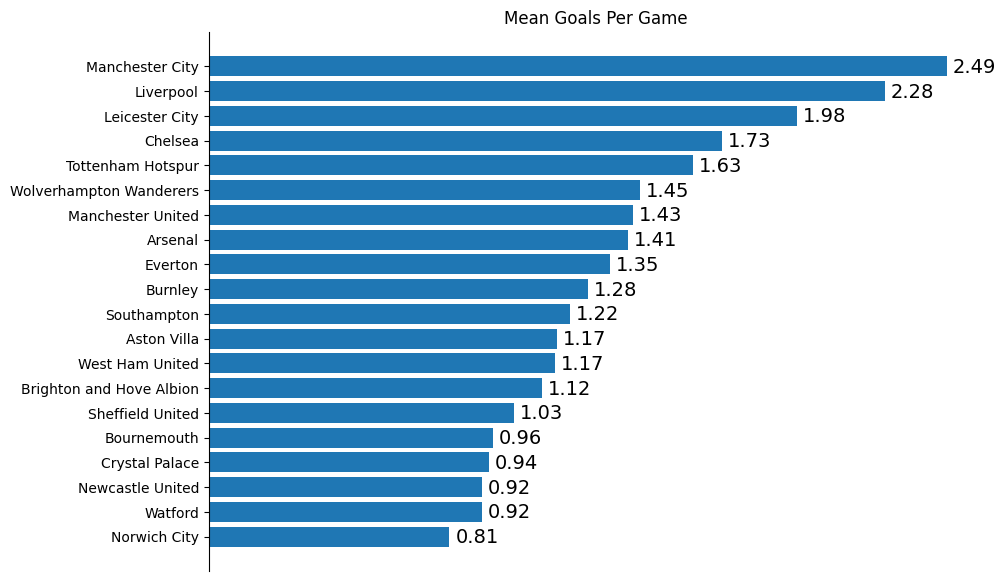

In [29]:
team_bar('Goals')

<ipython-input-28-1a128266d55c>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_temp.groupby('ForTeam').mean()


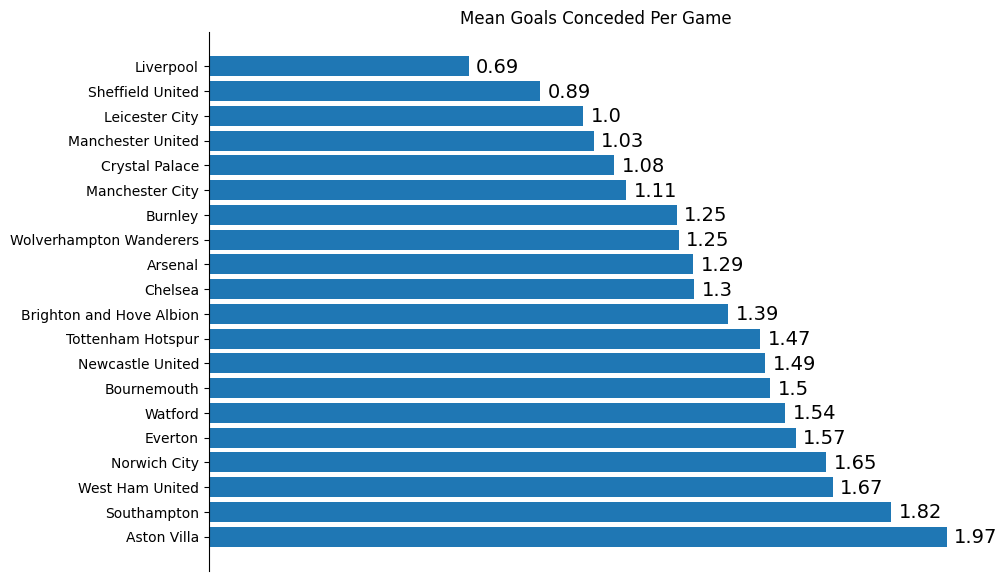

In [30]:
team_bar('GoalsConceded', order=False)

<ipython-input-28-1a128266d55c>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_temp.groupby('ForTeam').mean()


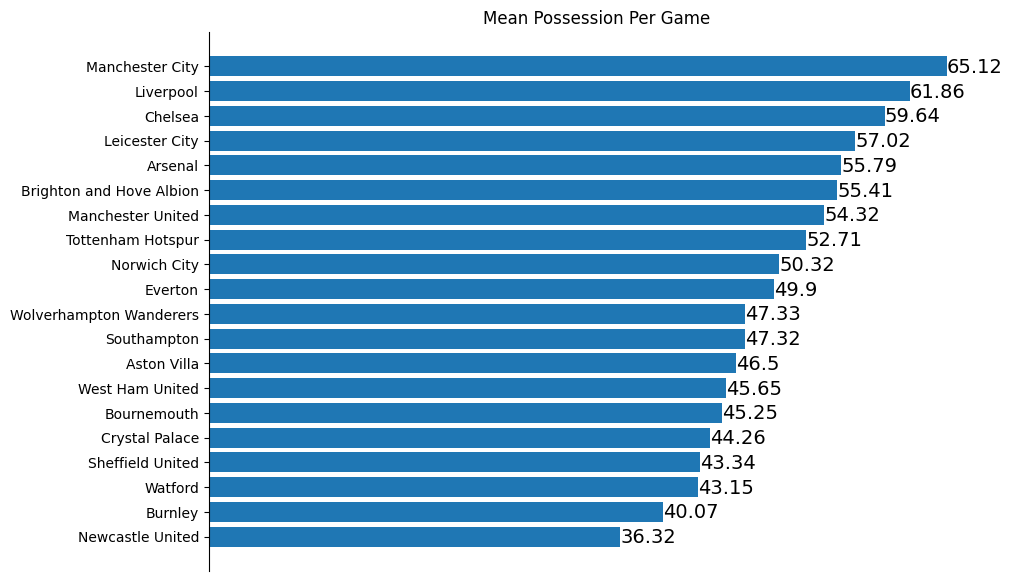

In [31]:
team_bar('Possession')